# Ridge Regression to predict wine rating from description text


## Conclusion
With relatively little effort (and no hyperparameter tuning), the Ridge regression is able to predict the wine rating with absolute error ~1 point, using just the words in the description. 


## TODO 
- n-grams: Instead of just single-word tokens (1-gram/unigram) we can also include word pairs.
- stemming/lemmatization - previous work with the logistic classifier suggested that this slowed model and hurt performance
- Representations: Instead of simple, binary vectors we can use word counts or TF-IDF to transform those counts.
- Algorithms: try other regression algorithms
- Hyperparameter tuning

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from src.nlp import preprocess_reviews
from src.data import process_data, load_processed_data
from src.model import fit_model, load_model
from src.visualization import plot_learning_curve
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

In [3]:
# %%time
# process_data()

In [4]:
%%time
X_train, X_val, X_test, y_train, y_val, y_test = load_processed_data()

Wall time: 91.9 ms


In [5]:
%%time
fit_model()

Wall time: 24.4 s


Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=0, solver='auto', tol=0.001)

In [6]:
model = load_model()

In [7]:
score = mean_absolute_error(y_test, model.predict(X_test))
print (f'Final Mean Absolute Error: {score}')

Final Mean Absolute Error: 1.2809830890436567


Wall time: 2min 12s


<module 'matplotlib.pyplot' from 'c:\\users\\zrankin\\appdata\\local\\continuum\\miniconda3\\envs\\kaggle\\lib\\site-packages\\matplotlib\\pyplot.py'>

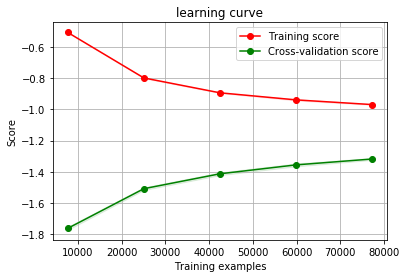

In [8]:
%%time
plot_learning_curve(model, 'learning curve', X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

# Explore effect of words on score prediction of a given description
Note - I had trouble implementing with the `shape.force_plot` due to number of features and some possible bugs with the `LinearExplainer`

In [10]:
from src.data import load_count_vectorizer
cv = load_count_vectorizer()

In [11]:
# make a data frame, which includes feature names
# Note - due to size, only get a subset of the data
df_test = pd.DataFrame(X_test[:100].toarray(), columns=cv.get_feature_names()) #, columns=cv.get_feature_names()

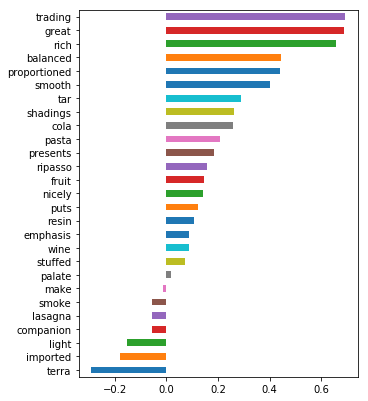

In [12]:
# These are not precisely shap values
np.random.seed(1)
idx = np.random.choice(df_test.index)
betas = pd.Series(df_test.iloc[idx]*model.coef_)
idx = np.abs(betas) > 0
shap_vals = betas.loc[idx].sort_values()
shap_vals.plot.barh(figsize=(5,len(shap_vals)*0.25))

# Scratch: 

In [ ]:
## Make sure we can load, clean, and predict any given raw description

In [13]:
def predict_description_score(description):
    words = preprocess_reviews([description])
    X = cv.transform(words)
    return model.predict(X)[0]

In [14]:
from src.data import load_descriptions

In [15]:
%%time
descriptions = load_descriptions(include_points=True)
cv = load_count_vectorizer()

Wall time: 1.24 s


In [16]:
descriptions.head()

,description,points
0,This tremendous 100% varietal wine hails from ...,96
1,"Ripe aromas of fig, blackberry and cassis are ...",96
2,Mac Watson honors the memory of a wine once ma...,96
3,"This spent 20 months in 30% new French oak, an...",96
4,"This is the top wine from La Bégude, named aft...",95


In [17]:
data = descriptions.sample(1)
description = data.description.values[0]
pred = predict_description_score(description)
score = data.points.values[0]
print(pred, score)
print(description)

88.92576063037887 89
From 70-year-old vines, this medium-bodied wine starts off with aromas of red currants tinged with cinnamon and herbs, then shows a darker side on the palate, ranging into flavors of coffee, plum and boysenberry. It's creamy in texture, finshing with dusty persistence. Drink 2014-2020.
